# Clustering

siapkan data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data
data = pd.read_csv("data/mall_customer.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Drop Column
col_to_drop = ["CustomerID", "Gender", "Age"]

data = data.drop(columns = col_to_drop)
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


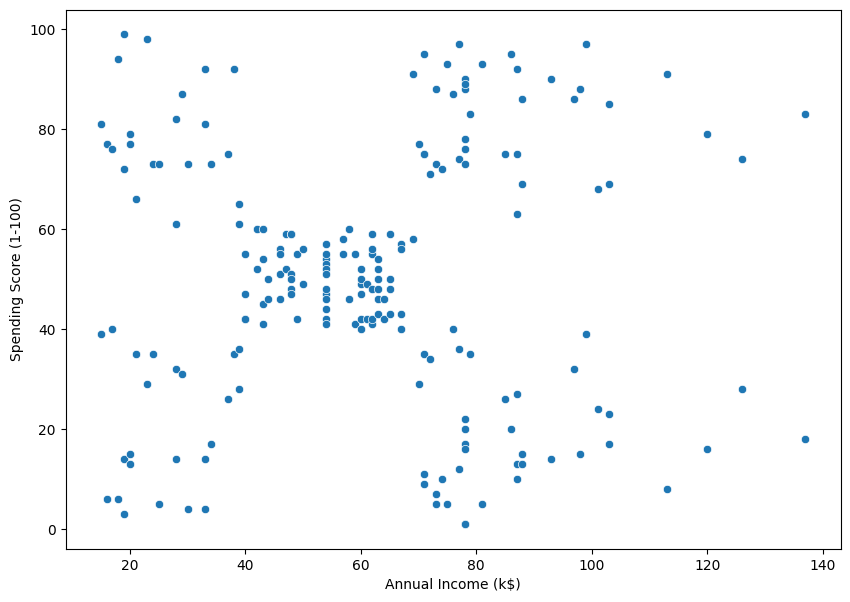

In [6]:
# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                ax = ax)

plt.show()

- Kita ingin representasikan data-data ini dengan cara
- Mengelompokkan data-data yang sejenis (membuat cluster)

---
# Algoritma k-Means Clustering

1. Pilih jumlah cluster ($k$)
2. Generate centroid untuk masing-masing cluster. Artinya akan ada $k$ centroid.
3. Update anggota cluster.
4. Update centroid.
5. Update anggota cluster.
6. Ulangi **langkah 4 & 5** hingga seluruh centroid tidak berubah.

1. Pilih jumlah cluster,  𝑘

In [7]:
# Melihat dari gambar
n_clust = 5

**2. Generate centroid untuk masing-masing cluster**

- Dibuat secara random

In [8]:
centroid = np.random.random((n_clust, data.shape[1]))

centroid[:, 0] = centroid[:, 0] * np.max(data["Annual Income (k$)"])
centroid[:, 1] = centroid[:, 1] * np.max(data["Spending Score (1-100)"])

centroid

# Kolom --> fitur
# Baris --> centroid

array([[ 21.73566937,  64.15507195],
       [ 70.43710372,  64.67199319],
       [126.68785849,  68.70265519],
       [  4.96316557,  39.06742349],
       [ 54.45770023,  52.20014043]])

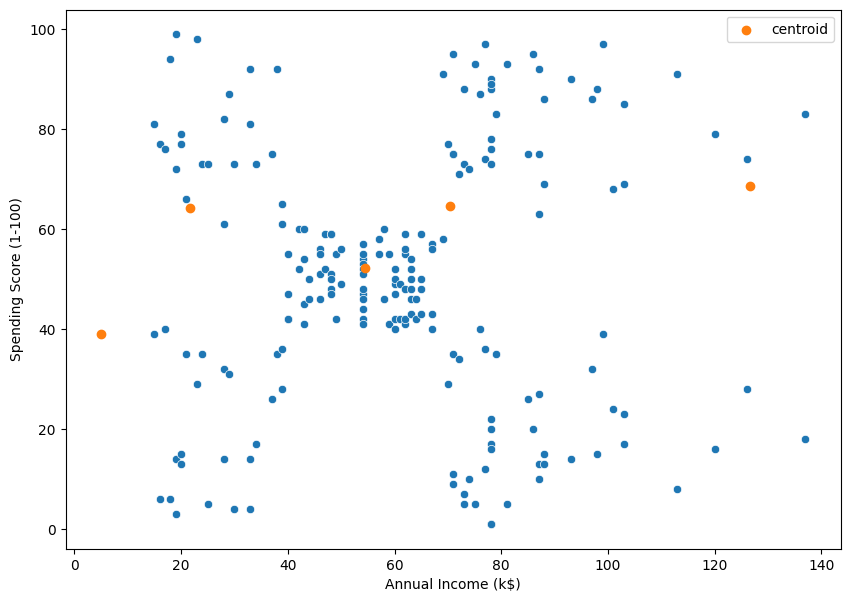

In [9]:
# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                ax = ax)
ax.scatter(centroid[:, 0], centroid[:, 1], label="centroid")

plt.legend()
plt.show()

3. Update Anggota Cluster

In [10]:
# Buat fungsi untuk update anggota cluster
def clusterAssignment(data, centroid):
    """
    Fungsi untuk menentukan data masuk ke centroid mana
    :param data: <pandas Dataframe> data sample
    :param centroid: <numpy array> list centroid
    :return c: <list> alamat cluster untuk setiap data
    """
    n = data.shape[0]       # banyak-nya data
    k = centroid.shape[0]   # banyak-nya centroid / cluster

    c = np.zeros(n)         # alamat data --> ukuran sama dengan jumlah data
    
    # Mencari alamat data 
    for i in range(n):
        # Define data ke-i
        data_i = data.loc[i]

        # cari list distance yang diisi jarak data ke masing-masing cluster
        list_distance = np.zeros(k)
        for j in range(k):
            # Define centroid ke-j
            centroid_j = centroid[j]

            # Hitung distance antara data_i - centroid_j
            list_distance[j] = np.linalg.norm(data_i - centroid_j)

        # Alamat data adalah jarak terkecil
        c[i] = np.argmin(list_distance) + 1

    return c


In [11]:
c = clusterAssignment(data = data,
                      centroid = centroid)

c

array([4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4.,
       1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1.,
       4., 1., 4., 1., 5., 1., 5., 1., 5., 1., 5., 1., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2., 5.,
       2., 2., 5., 2., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2.,
       5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5.,
       2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 2., 2.,
       5., 2., 5., 2., 5., 2., 5., 2., 5., 2., 2., 2., 2., 3., 2., 3., 2.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

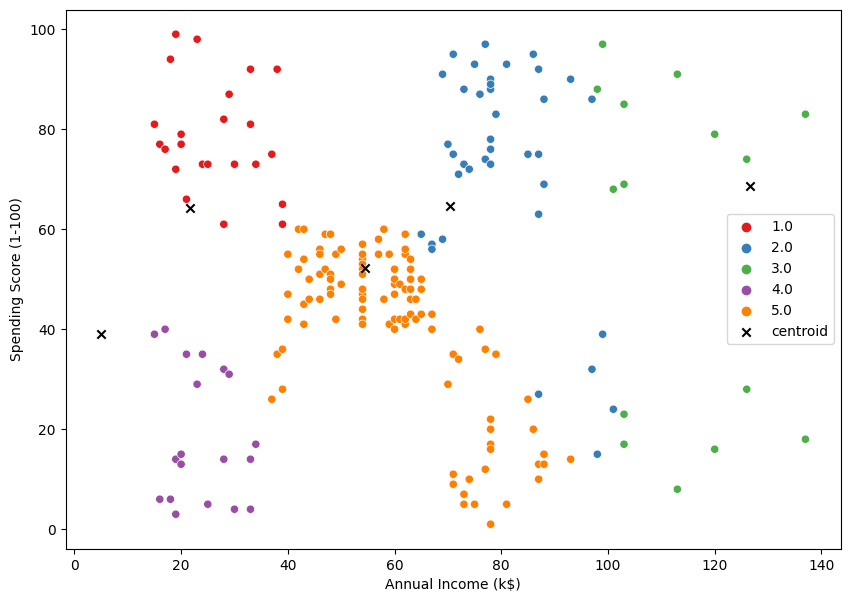

In [12]:
# New data
data_new = data.copy()
data_new["cluster"] = c

# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_new,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "cluster",
                palette = "Set1",
                ax = ax)
ax.scatter(centroid[:, 0], centroid[:, 1], 
           marker="x", c="k", label="centroid")

plt.legend()
plt.show()

4. Update Centroid Baru

In [13]:
def updateCentroid(data, centroid, c):
    """
    Fungsi untuk update centroid baru
    :param data: <pandas DataFrame> sampel data
    :param centroid: <numpy Array> centroid
    :param c: <numpy Array> list alamat data
    :return centroid_new: <numpy Array> centroid baru
    """
    # Ubah data ke dalam numpy array
    data = np.array(data.copy())

    # Cari ukuran
    n = data.shape[0]
    p = data.shape[1]
    k = centroid.shape[0]

    # Cari centroid baru
    centroid_new = np.zeros((k, p))    
    for j in range(k):
        # Cari data yang ada di cluster j
        data_in_cluster_j = data[c == j+1]

        # Cari rata-rata data yang ada di cluster j
        centroid_new[j, :] = np.mean(data_in_cluster_j, axis=0)

    return centroid_new


In [14]:
centroid_new = updateCentroid(data = data,
                              centroid = centroid,
                              c = c)

centroid_new

array([[ 26.30434783,  78.56521739],
       [ 80.12820513,  72.71794872],
       [113.46666667,  56.26666667],
       [ 23.78947368,  18.73684211],
       [ 59.88461538,  40.35576923]])

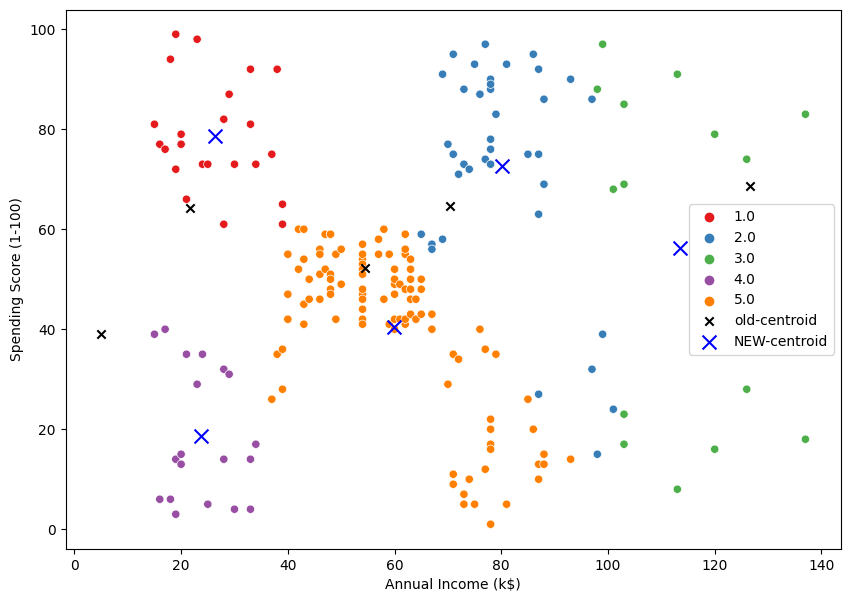

In [15]:
# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_new,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "cluster",
                palette = "Set1",
                ax = ax)

ax.scatter(centroid[:, 0], centroid[:, 1], 
           marker="x", c="k", label="old-centroid")

ax.scatter(centroid_new[:, 0], centroid_new[:, 1], 
           marker="x", c="b", s=100, label="NEW-centroid")

plt.legend()
plt.show()

**TAMBAHAN: Buat Clustering Objective**

- Untuk menentukan jarak within cluster

In [16]:
def clusteringObjective(data, centroid, c):
    """
    Fungsi untuk update centroid baru
    :param data: <pandas DataFrame> sampel data
    :param centroid: <numpy Array> centroid
    :param c: <numpy Array> list alamat data
    :return J_obj: <numpy Array> within cluster distance
    """
    # Ubah data ke dalam numpy array
    data = np.array(data.copy())
    
    # Cari ukuran
    n = data.shape[0]
    k = centroid.shape[0]

    # Cari distance within cluster
    J_obj = 0
    for i in range(n):
        # ekstrak data
        data_i = data[i]
        cluster_data_i = int(c[i]-1)
        centroid_data_i = centroid[cluster_data_i]

        # cari distance
        distance_i = np.linalg.norm(data_i - centroid_data_i)**2

        # jumlahkan distance ke J_obj
        J_obj += distance_i

    # Cari rata-rata J_obj
    J_obj = J_obj/n

    return J_obj


In [17]:
J_obj = clusteringObjective(data = data,
                            centroid = centroid_new,
                            c = c)
J_obj

463.0736942219678

5. Buat Fungsi Total untuk melakukan seluruh perulangan

In [18]:
def kmeansClustering(data, n_clust, max_iter=1000, epsilon=1e-6):
    # Inisialisasi untuk monitoring
    J_obj_hist = []

    # Inisialisasi untuk ukuran
    n = data.shape[0]       # banyak data
    p = data.shape[1]       # banyak fitur
    k = n_clust             # banyak cluster

    # 1. Buat centroid
    centroid = np.random.random((n_clust, p))
    
    for i in range(p):
        cols = data.columns[i]
        centroid[:, i] = centroid[:, i] * np.max(data[cols])

    # Mulai perulangan
    for i in range(max_iter):
        # 2. Assign data ke cluster
        c = clusterAssignment(data = data,
                              centroid = centroid)
        
        # Cari J_obj untuk monitoring
        J_obj = clusteringObjective(data = data,
                                    centroid = centroid,
                                    c = c)
        J_obj_hist.append(J_obj)

        # 3. Update centroid
        centroid_new = updateCentroid(data = data,
                                      centroid = centroid,
                                      c = c)
        
        # Cek apa harus stop/tidak
        condition_1 = np.linalg.norm(centroid_new - centroid) < epsilon
        condition_2 = i == max_iter-1
        if condition_1 or condition_2:
            centroid = centroid_new.copy()
            break
        else:
            centroid = centroid_new.copy()

    return centroid, c, J_obj_hist


In [19]:
centroid, c, J_obj_hist = kmeansClustering(data = data, 
                                           n_clust = 5)

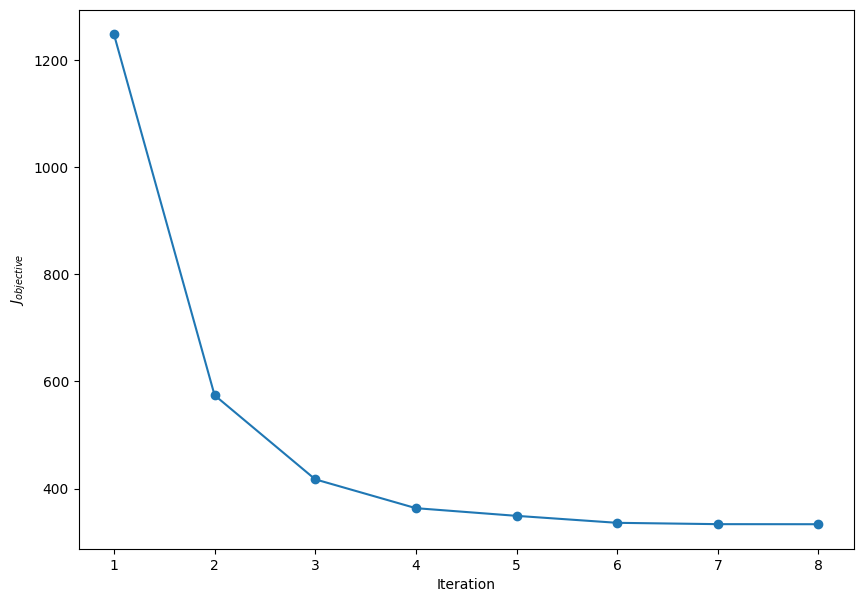

The final J_objective = 333.3266


In [20]:
# visualkan

# Objective History
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot([i+1 for i in range(len(J_obj_hist))],
        J_obj_hist,
        marker = "o")

ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{objective}$")
plt.show()

print(f'The final J_objective = {J_obj_hist[-1]:.4f}')

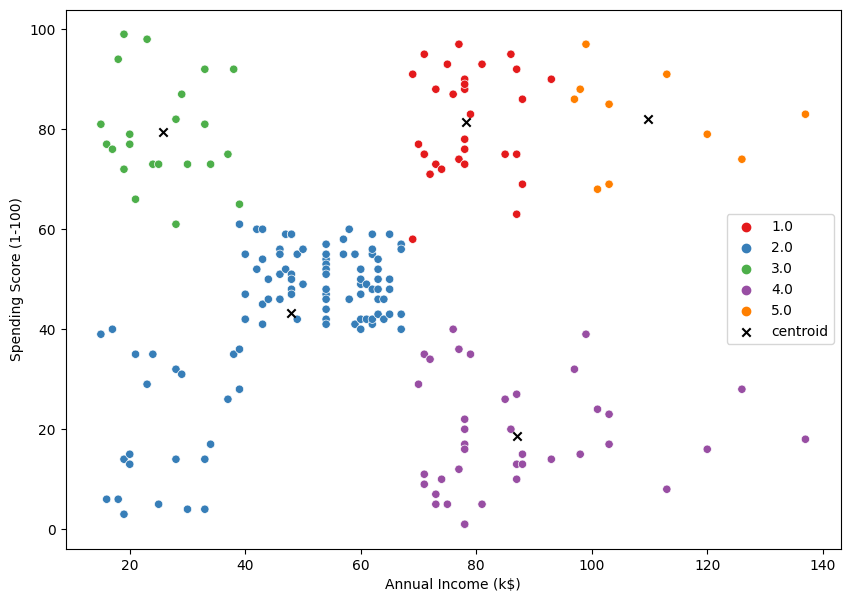

In [21]:
# Plot Final Cluster
# New data
data_new = data.copy()
data_new["cluster"] = c

# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_new,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "cluster",
                palette = "Set1",
                ax = ax)

ax.scatter(centroid[:, 0], centroid[:, 1], 
           marker="x", c="k", label="centroid")

plt.legend()
plt.show()

---
# Menggunakan SKLEARN

In [22]:
from sklearn.cluster import KMeans

Buat objek & fit

In [23]:
# Buat objek
cluster_object = KMeans(n_clusters = 5)

# Fit objek
cluster_object.fit(data)

c:\Users\Opal\anaconda3\envs\dashboard_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [24]:
# Ekstrak principal components
cluster_object.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [25]:
# Ekstrak centroid
cluster_object.cluster_centers_

# Kolom -> fitur
# Baris -> centroid ke-

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [26]:
# Ekstrak J_obj/inertia
cluster_object.inertia_

44448.45544793371

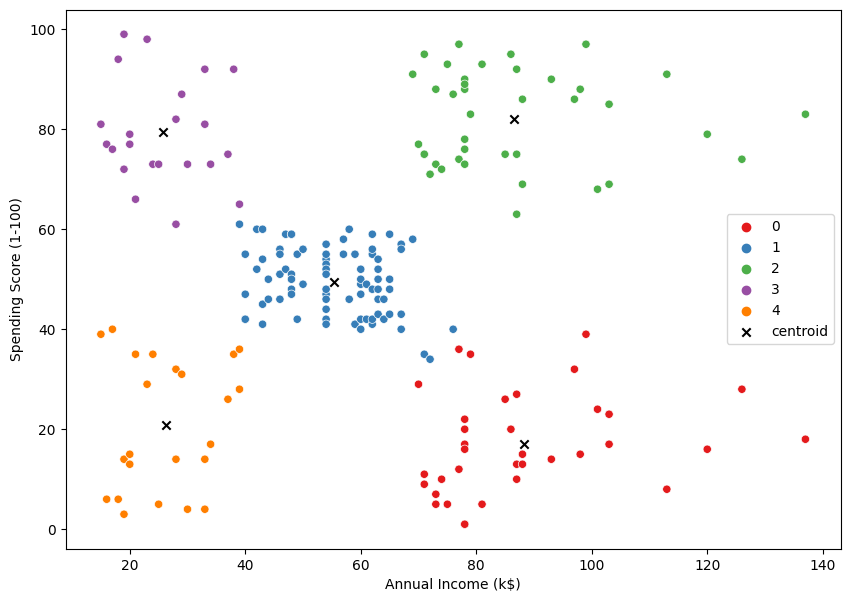

In [27]:
# Visualkan

# Plot Final Cluster
# New data
data_new = data.copy()
data_new["cluster"] = cluster_object.labels_

# Visualisasikan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_new,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "cluster",
                palette = "Set1",
                ax = ax)

ax.scatter(cluster_object.cluster_centers_[:, 0], 
           cluster_object.cluster_centers_[:, 1], 
           marker="x", c="k", label="centroid")

plt.legend()
plt.show()